In [1]:
%run Common.ipynb
import os.path
import pandas as pd

#!pip install surprise
from surprise import Dataset, Reader
from surprise.prediction_algorithms.knns import KNNWithMeans
from surprise.prediction_algorithms.matrix_factorization import SVD, NMF
from surprise.model_selection.validation import cross_validate

#new function added for Q15
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import label_binarize
from surprise.model_selection import train_test_split #train, test data split

np.set_printoptions(suppress=True,floatmode='maxprec_equal')

<h1>Question 34</h1>

In [2]:
ratings_df = pd.read_csv('ml-latest-small/ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',', skip_lines=1)
data = Dataset.load_from_file('ml-latest-small/ratings.csv', reader=reader)
trainset, testset = train_test_split(data, test_size=.1)

In [3]:
threshold = 3.0
binarizer = Binarizer(threshold=threshold)

In [4]:
# KNN
sim_options = {'name': 'pearson',
               'user_based': True  # compute similarities between users
               }
#k from Q11 is 18
k = 18
knn = KNNWithMeans(k, sim_options=sim_options, verbose=False)
knn.fit(trainset)
predictions = knn.test(testset)

test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
knn_fpr, knn_tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))

In [5]:
# NMF
#from Q17 & 18, use k for minimum RMSE
k = 20
nmf = NMF(n_factors=k)
nmf.fit(trainset)
predictions = nmf.test(testset)

test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
nmf_fpr, nmf_tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))

In [6]:
# MF w/ Bias
#from Q24 & 25, use k for minimum RMSE
k = 8
svd = SVD(n_factors=k)
_ = svd.fit(trainset)
predictions = svd.test(testset)

test_preds = np.array([i.est for i in predictions])
test_labels = np.array([i[2] for i in testset]).reshape(1, -1)
test_labels_bin = binarizer.transform(test_labels)
mf_fpr, mf_tpr, _ = roc_curve(test_labels_bin.reshape(-1,1), test_preds.reshape(-1,1))

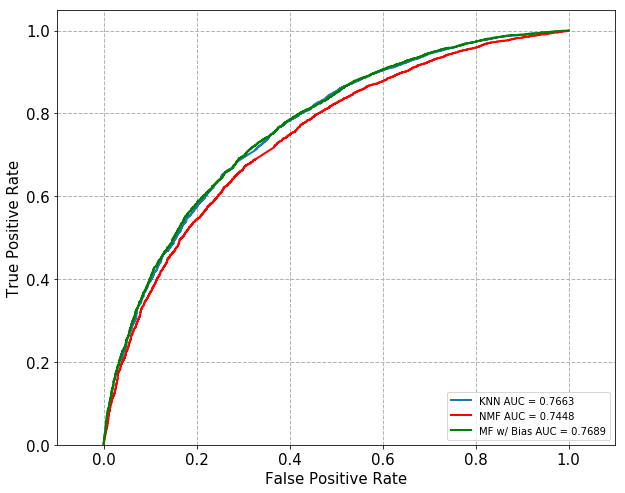

In [7]:
fig, ax = plt.subplots()
fig.set_figwidth(10)
fig.set_figheight(8)

knn_roc_auc = auc(knn_fpr, knn_tpr)
nmf_roc_auc = auc(nmf_fpr, nmf_tpr)
mf_roc_auc = auc(mf_fpr, mf_tpr)

ax.plot(knn_fpr, knn_tpr, lw=2, label= 'KNN AUC = %0.4f' % knn_roc_auc)
ax.plot(nmf_fpr, nmf_tpr, lw=2, label= 'NMF AUC = %0.4f' % nmf_roc_auc, color='red')
ax.plot(mf_fpr, mf_tpr, lw=2, label= 'MF w/ Bias AUC = %0.4f' % mf_roc_auc, color='green')

ax.grid(color='0.7', linestyle='--', linewidth=1)

ax.set_xlim([-0.1, 1.1])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate',fontsize=15)
ax.set_ylabel('True Positive Rate',fontsize=15)

ax.legend(loc="lower right")

for label in ax.get_xticklabels()+ax.get_yticklabels():
    label.set_fontsize(15)